In [1]:
import sys, os
import random
import numpy as np
import csv
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [2]:
def readCSV(folder, array,y):
    CSV = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().endswith('.csv')]
    for fileIn in CSV:
        
        if 'fist' in fileIn:
            for x in range(50):
                y.append(0)
        else:
            for x in range(50):
                y.append(1)
        print(len(array))
        print(len(y))
        inArr=[]
        with open(fileIn, 'r') as file: 
            reader = csv.reader(file)
            next(reader)
            numSamples = 0;
            x = 0
            for lines in reader:
                lines.pop()
                if np.size(lines)!=6:
                    print(np.size(lines))
                    print(fileIn)
                    return -1
                for vals in lines:
                  inArr.append(vals)
                x = x + 1 
                if x >= 119:
                    numSamples=numSamples+1
                    array.append(inArr)
                    x = 0 
                    inArr = []

In [6]:
X = []
y = []
readCSV('C:\\Users\\hazel\\Desktop\\IMU\\Jake Keels - 2022-03-01 19.32.11 - Jake_Keels',X,y)

0
50
50
100


Random Forest model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



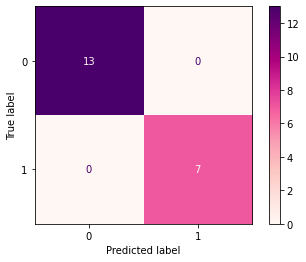

In [7]:
model = modelLearning(X,y)

In [8]:
X = []
y = []
readCSV('C:\\Users\\hazel\\Desktop\\IMU',X,y)

0
50
50
100
100
150
150
200
200
250
250
300
300
350
350
400
400
450
450
500
500
550
550
600
600
650
650
700
700
750
750
800
800
850
850
900
900
950
950
1000
1000
1050
1050
1100
1100
1150
1150
1200
1200
1250
1250
1300
1300
1350
1350
1400
1400
1450
1450
1500
1500
1550
1550
1600
1600
1650
1650
1700
1700
1750
1750
1800
1800
1850
1850
1900
1900
1950
1950
2000


In [9]:
def testPredict(X_train, X_test, y_train, y_test,model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test, cmap='RdPu')
    print(metrics.classification_report(y_test, ypred))
    
def modelLearning(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2)
    model = RandomForestClassifier(max_depth = 2, n_estimators = 100)
    print('Random Forest model')
    testPredict(X_train, X_test, y_train, y_test,model)
    return model

In [ ]:
model = modelLearning(X,y)

In [ ]:
from micromlgen import port

with open("C:\\Users\\hazel\\Desktop\\arduino\\sketch_apr21a\\Classifier.h", "w") as file:
    file.write(port(model, classname="Classifier"))